In [7]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [8]:
import numpy as np
import pandas as pd
import numba
from math import ceil

from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, ConvexHull
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import tqdm

In [9]:
import holoviews as hv
hv.extension("matplotlib")

import colorcet as cc
ceiling = np.vectorize(ceil)
sample_cycle = lambda cycle, size: hv.Cycle(
    [cycle[i] for i in ceiling(np.linspace(0, len(cycle) - 1, size))]
)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [10]:
import lattice_signaling as lsig

<hr>

What we observe is that over a few days of culture, the speed of the wavefront of signal induction gradually slows down to almost zero.

- Very hard to pinpoint "100% confluence". Also, cells are still motile at 100% confluence. So it's hard to see from these videos what the maximum velocity would be at 100% confluency, without motility.
- At super-confluence, ~1 cell length/growth time is the minimum induction speed

During this time we observe a few changes. 

1. The density of cells (number of cells per unit area) increases due to cell division
2. Cells undergo a change in shape, becoming more rounded and reducing the amount of cell-cell contact.
3. Cells slow down and eventually become "locked" in a position
4. The edge of the ring is brighter than the inside.

First, let's address (1) and (2). Does lateral induction dampen over time due to a reduction in surface area as cells become more packed? Or do the changes in shape that accompany growth play a role?

<hr>

Here we present 3-4 dynamical models. For each model, I show

- Induction speed vs density/efficiency for our three model classes (heatmap)
- Curves showing vmean drop as a function of density/efficiency for selected parameter sets
- Animations showing fast, slow, and fast-to-slow propagation for a selected parameter set

From this, we can draw conclusions about which model can best explain our results.

<hr>

Let 

\begin{align}
\mathbf{s}(t)=s_i(t), \; i\in\{1, ... n\}
\end{align}

be the concentration of signal molecule (ligand) $S$ expressed in each cell $i$ as a function of time $t$. For cells arranged on a regular lattice of edge length $\ell$, cell-cell signaling interactions can be represented as the flux $\dot{s}$ on a network. 

\begin{align}
\dot{\mathbf{s}} &= \lambda + \alpha \,\frac{\vec{s}_\textit{trans}^p}{K^p + \left(\delta\, \vec{s}_\textit{cis}\right)^p + \vec{s}_\textit{trans}^p} - \vec{s}\\[1em]
\vec{s}_\textit{trans} &= \beta\,\ell\,A\,\vec{s}(t - \tau) \\[1em]
\vec{s}_\textit{cis} &= 6\,\ell\,\vec{s}(t - \tau),
\end{align}

where $\tau$ is the time delay due to transcription and translation of signal protein. Parameters $\alpha$ and $\lambda$ are the regulated and leaky signal production rates, respectively. The Hill threshold $k$, Hill coefficient $p$, and relative scaling factor $\delta$ govern the nonlinear response to $\mathbf{s}_\textit{trans}$ and $\mathbf{s}_\textit{cis}$, the total amounts of *trans-*ligand exposed to each cell and *cis-*ligand expressed by cell. Cell adjacency is encoded in the adjacency matrix

\begin{align}
A=\begin{pmatrix}
a_{ij}
\end{pmatrix}
=\left\{
\begin{array}\\
1 & \text{if cells $i$, $j$ are adjacent}\\
0 & \text{else}
\end{array}
\right.
\end{align}

Cell nuclei are assumed to be of constant volume, and thus the amount of ligand required to trigger promoter activation is considered invariant with respect to cell shape and volume. The cell-cell interface length $\beta$ is expressed as a proportion of lattice edge length $\ell$ ($\beta < 1$ indicates shortening of the interface, e.g. as a result of actomyosin-mediated cortical tension). 

<hr>

| Parameter | significance |
|---|---|
| $\mathbf{s}$ | [S] (ligand) in each cell |
| $\alpha$ | max. production rate |
| $k$      | threshold concentration |
| $p$      | Hill coefficient |
| $\tau$   | delay from transcription-translation |
| $\ell$   | cell-cell interface length |
| $A$      | cell-cell adjacency matrix |
| $P_0$    | cell perimeter at 100% confluency |
| $r_0$    | cell-cell distance at 100% confluency |

<hr>

## Model 1: Simple lateral induction

For a tissue consisting of $n$ cells, consider the following dynamical model. Let $$\mathbf{s}(t)=\big(s_i(t)\big), \; i\in\{1, ... n\}$$ be the concentration of signal molecule (ligand) $[S]$ expressed in each cell as a function of time. For cells arranged on a regular lattice of edge length $\ell$, signaling dynamics can be represented as

\begin{align}
\dot{\vec{s}} &= \alpha \,\frac{\vec{s}_t(t-\tau)^p}{\big(P_0\, k\big)^p + \vec{s}_t(t-\tau)^p} - \vec{s}\\[1em]
\vec{s}_t &= \ell\,A\,\vec{s}
\end{align}

\begin{align}
\frac{\mathrm{d}s_i}{\mathrm{d}t} = \dot{s_i} &= \alpha \,\frac{s_t(t-\tau)^p}{K^p + s_t(t-\tau)^p} - s_i\\[1em]
\mathbf{s}_t(t) &= \ell\,A\,\mathbf{s}(t) \\[1em]
\ell = 1
\end{align}

\begin{align}
, \quad P_0 = \frac{6\, r_0}{\sqrt{3}}
\end{align}

where $\dot{\mathbf{s}}$ is the time-derivative of $\mathbf{s}$ in each cell.

In [11]:
def get_rhs(Adj, sender_idx, func):
    def rhs(S, S_delay, *args):
        return func(S, S_delay, Adj, sender_idx, *args)
    return rhs

In [12]:
@numba.njit
def tc_rhs_1(S, S_delay, Adj, sender_idx, alpha, k, p, ell):
    """
    """

    # Get input signal across each interface
    S_bar = ell * (Adj @ S_delay)
    
    # Calculate dE/dt
    dS_dt = alpha * (S_bar ** p) / ((6 / np.sqrt(3) * k) ** p + S_bar ** p) - S

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

In [13]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [14]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0.0, 0.5, 33)[1:]
r_space = 1/np.sqrt(np.linspace(1, 2, 33))

free_params = (k_space, r_space)

param_space = np.meshgrid(*free_params)
param_space1i = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs1i = param_space1i.shape[0]

    n     = 400 cells
    alpha = 3
    p     = 2
    tau   = 0.4


In [15]:
alpha = 3
# k = 0.1
p = 2
# ell = 1.

delay = 0.4

L = 20

In [16]:
iterator = range(n_runs1i)
iterator = tqdm.tqdm(iterator)
vmeans1i = np.empty(n_runs1i, dtype=np.float32)
for i in iterator:
    k, r = param_space1i[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_1)
    
    ell = r/np.sqrt(3)
    args = (alpha, k, p, ell)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans1i[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1056/1056 [01:14<00:00, 14.12it/s]


In [17]:
data1i = pd.DataFrame({
    "signaling threshold": param_space1i[:, 0], 
    "cell-cell distance": param_space1i[:, 1],
    "Mean wavefront speed": vmeans1i,
})

data1i["% confluency"] = 100 * data1i["cell-cell distance"] ** -2
data1i["normalized induction speed"] = data1i["Mean wavefront speed"] / data1i["cell-cell distance"]

:Points   [% confluency,signaling threshold]   (normalized induction speed)
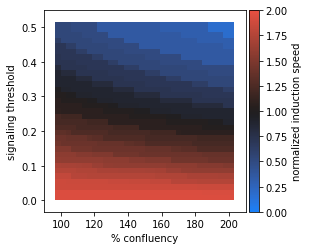

In [18]:
%%capture --no-stdout --no-display

plt1i = hv.Points(
    data=data1i,
    kdims=["% confluency", "signaling threshold"],
    vdims=["normalized induction speed", ],
# ).groupby(
#     ["% confluency"]
).opts(
    color="normalized induction speed",
    cmap=cc.bkr,
#     logx=True,
    s=120,
#     aspect=2.3,
    padding=0.1,
    colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     2
# ).opts(
#     title="Propagation speed drops slightly as confluency increases",
)


plt1i

In [19]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [20]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.logspace(np.log10(0.05), np.log10(0.5), 33)
r_space = 1/np.sqrt(np.linspace(1, 2, 33))

free_params = (k_space, r_space)

param_space = np.meshgrid(*free_params)
param_space1ilog = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs1ilog = param_space1ilog.shape[0]

    n     = 400 cells
    alpha = 3
    p     = 2
    tau   = 0.4


In [21]:
alpha = 3
# k = 0.1
p = 2
# ell = 1.

delay = 0.4

L = 20

In [22]:
iterator = range(n_runs1ilog)
iterator = tqdm.tqdm(iterator)
vmeans1ilog = np.empty(n_runs1ilog, dtype=np.float32)
for i in iterator:
    k, r = param_space1ilog[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_1)
    
    ell = r/np.sqrt(3)
    args = (alpha, k, p, ell)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans1ilog[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1089/1089 [01:18<00:00, 13.81it/s]


In [23]:
data1ilog = pd.DataFrame({
    "signaling threshold": param_space1ilog[:, 0], 
    "cell-cell distance": param_space1ilog[:, 1],
    "Mean wavefront speed": vmeans1ilog,
})

data1ilog["% confluency"] = 100 * data1ilog["cell-cell distance"] ** -2
data1ilog["normalized induction speed"] = data1ilog["Mean wavefront speed"] / data1ilog["cell-cell distance"]

:Points   [% confluency,signaling threshold]   (normalized induction speed)
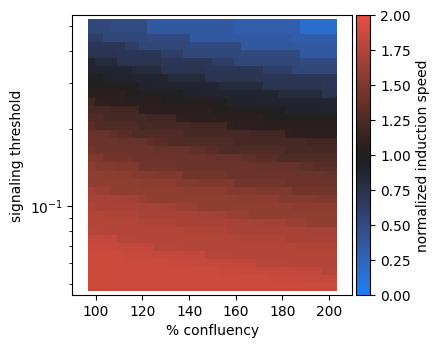

In [24]:
%%capture --no-stdout --no-display

plt1ilog = hv.Points(
    data=data1ilog,
    kdims=["% confluency", "signaling threshold"],
    vdims=["normalized induction speed", ],
# ).groupby(
#     ["% confluency"]
).opts(
    color="normalized induction speed",
    cmap=cc.bkr,
    logy=True,
    s=120,
    aspect=1/2.3,
    padding=0.1,
    colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     2
# ).opts(
#     title="Propagation speed drops slightly as confluency increases",
)


hv.output(plt1ilog, dpi=100)

In [75]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0.0, 0.4, 5)[1:]
r_space = 1/np.sqrt(np.linspace(1, 2, 33))

free_params = (k_space, r_space)

param_space = np.meshgrid(*free_params)
param_space1icurve = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs1icurve = param_space1icurve.shape[0]

In [52]:
alpha = 3.
# k = 0.1
p = 2
# ell = 1.

delay = 0.4

L = 20

In [53]:
iterator = range(n_runs1icurve)
iterator = tqdm.tqdm(iterator)
vmeans1icurve = np.empty(n_runs1icurve, dtype=np.float32)
for i in iterator:
    k, r = param_space1icurve[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_1)
    
    ell = r/np.sqrt(3)
    args = (alpha, k, p, ell)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans1icurve[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 132/132 [00:09<00:00, 13.60it/s]


In [54]:
data1icurve = pd.DataFrame({
    "signaling threshold": param_space1icurve[:, 0], 
    "cell-cell distance": param_space1icurve[:, 1],
    "Mean wavefront speed": vmeans1icurve,
})

data1icurve["% confluency"] = 100 * data1icurve["cell-cell distance"] ** -2
data1icurve["normalized induction speed"] = data1icurve["Mean wavefront speed"] / data1icurve["cell-cell distance"]

:NdOverlay   [signaling threshold]
   :Curve   [% confluency]   (normalized induction speed,signaling threshold)
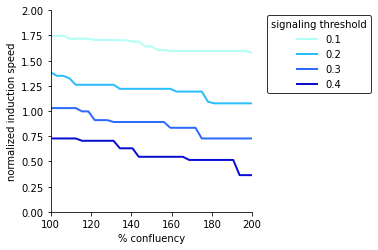

In [55]:
%%capture --no-stdout --no-display

cycle = sample_cycle(cc.kbc[::-1], 5)

plt1icurve = hv.Curve(
    data=data1icurve,
    kdims=["% confluency"],
    vdims=["normalized induction speed", "signaling threshold"],
).groupby(
    ["signaling threshold"]
).opts(
    padding=0.1,
).options(
).overlay(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
# ).cols(
#     2
).opts(
    ylim=(0,2),
    legend_position="right",
).options(
    {"Curve": dict(color=cycle)}
)


plt1icurve

In [709]:
import importlib
importlib.reload(lsig)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<module 'lattice_signaling' from 'C:\\Users\\Pranav\\git\\evomorph\\sandbox\\lattice_signaling.py'>

In [741]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [742]:
alpha = 3.
k = 0.2
p = 2
# r = 1.

delay = 0.4

L = 20

In [743]:
ra, rb = 1, 1/np.sqrt(2)

Xa, Adja = lsig.hex_Adj(L, r=ra, csr=False)
na = Xa.shape[0]
sender_idxa = lsig.get_center_cells(Xa)[0]
S0a = np.zeros(na, dtype=np.float32)
S0a[sender_idxa] = 1

rhs = get_rhs(Adja, sender_idxa, tc_rhs_1)

ella = ra/np.sqrt(3)
args = (alpha, k, p, ella)

Sa = lsig.integrate_DDE(
    t_span=t,
    rhs=rhs,
    dde_args=args,
    E0=S0a,
    delay=delay,
    progress_bar=True,
)


100%|██████████| 1000/1000 [00:00<00:00, 20054.43it/s]


In [768]:
Xb, Adjb = lsig.hex_Adj(L, r=rb, csr=False)
nb = Xb.shape[0]
sender_idxb = lsig.get_center_cells(Xb)[0]
S0ab = Sa[(nt // 2 + 1)]
S0b = np.zeros(nb, dtype=np.float32)
S0b[sender_idxb] = 1

rhs = get_rhs(Adjb, sender_idxb, tc_rhs_1)

ellb = rb/np.sqrt(3)
args = (alpha, k, p, ellb)

Sab = lsig.integrate_DDE(
    t_span=t[:(nt // 2 + 1)],
    rhs=rhs,
    dde_args=args,
    E0=S0ab,
    delay=delay,
    progress_bar=True,
)

Sb = lsig.integrate_DDE(
    t_span=t,
    rhs=rhs,
    dde_args=args,
    E0=S0b,
    delay=delay,
    progress_bar=True,
)

100%|██████████| 1000/1000 [00:00<00:00, 26387.07it/s]


In [769]:
Sab = np.concatenate([Sa[:(nt // 2 + 1)], Sab[1:]])

In [747]:
fnamea = f"hex_conc_alpha{alpha:.1f}_k{k:.1e}_p{p:.1f}_delta{delta:.1f}_tau{delay:.2f}_percdens{100/(ra**2):.0f}_title"
fnameb = f"hex_conc_alpha{alpha:.1f}_k{k:.1e}_p{p:.1f}_delta{delta:.1f}_tau{delay:.2f}_percdens{100/(rb**2):.0f}_title"
fnameab = f"hex_conc_alpha{alpha:.1f}_k{k:.1e}_p{p:.1f}_delta{delta:.1f}_tau{delay:.2f}_percdens{100/(ra**2):.0f}-{100/(rb**2):.0f}_title"

In [755]:
ras = np.array([ra] * nt)
rbs = np.array([rb] * nt)
rabs = np.concatenate([np.repeat([ra], nt // 2), np.repeat([rb], nt // 2 + 1)])

confas = 100 / (ras **2)
confbs = 100 / (rbs **2)
confabs = 100 / (rabs **2)

In [756]:
radas = np.repeat(lsig.beta_to_rad(np.array([1]), ra), n*nt).reshape(nt, n)
radbs = np.repeat(lsig.beta_to_rad(np.array([1]), rb), n*nt).reshape(nt, n)

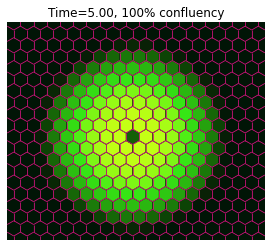

In [762]:
title_funa = lambda i: f"Time={t[i]:.2f}, {confas[i]:.0f}% confluency"

lsig.inspect_out(
    X=Xa,
    cell_radii=radas,
    L=L,
    var=Sa, 
    vmin=0, 
    vmax=3, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    ppatch_kwargs=dict(edgecolor=None, linewidth=0.5),
    lcoll_kwargs=dict(linewidth=0.8),
    title=title_funa(nt-1)
)

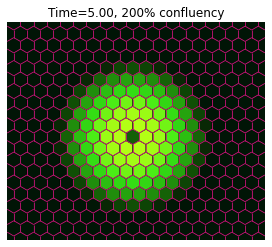

In [763]:
title_funb = lambda i: f"Time={t[i]:.2f}, {confbs[i]:.0f}% confluency"

lsig.inspect_out(
    X=Xb,
    cell_radii=radbs,
    L=L,
    var=Sb, 
    vmin=0, 
    vmax=3, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    ppatch_kwargs=dict(edgecolor=None, linewidth=0.5),
    lcoll_kwargs=dict(linewidth=0.8),
    title=title_funb(nt-1)
)

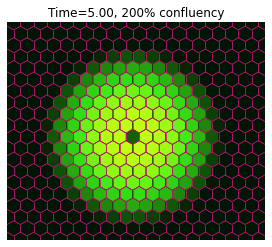

In [772]:
title_funab = lambda i: f"Time={t[i]:.2f}, {confabs[i]:.0f}% confluency"

lsig.inspect_out(
    X=Xa,
    cell_radii=radas,
    L=L,
    var=Sab, 
    vmin=0, 
    vmax=3, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    ppatch_kwargs=dict(edgecolor=None, linewidth=0.5),
    lcoll_kwargs=dict(linewidth=0.8),
    title=title_funab(nt-1)
)

Writing to: plots\hex_conc_alpha3.0_k2.0e-01_p2.0_delta3.0_tau0.40_percdens100_title


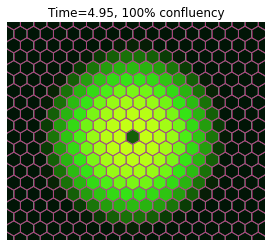

In [761]:
lsig.animate_var(
    X=Xa,
    cell_radii=radas,
    L=L,
    var=Sa, 
#     n_frames=100,
    file_name=fnamea,
#     dir_name="plots",
#     fps=20, 
    vmin=0, 
    vmax=3, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    lcoll_kwargs=dict(linewidth=0.5),
    title_fun=title_funa
)

Writing to: plots\hex_conc_alpha3.0_k2.0e-01_p2.0_delta3.0_tau0.40_percdens200_title


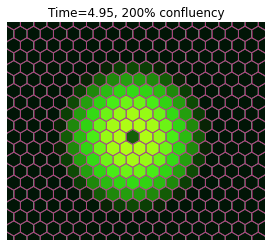

In [774]:
lsig.animate_var(
    X=Xb,
    cell_radii=radbs,
    L=L,
    var=Sb, 
#     n_frames=100,
    file_name=fnameb,
#     dir_name="plots",
#     fps=20, 
    vmin=0, 
    vmax=3, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    lcoll_kwargs=dict(linewidth=0.5),
    title_fun=title_funb
)

Writing to: plots\hex_conc_alpha3.0_k2.0e-01_p2.0_delta3.0_tau0.40_percdens100-200_title


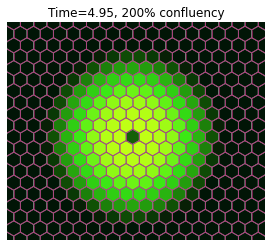

In [775]:
lsig.animate_var(
    X=Xa,
    cell_radii=radas,
    L=L,
    var=Sab, 
#     n_frames=100,
    file_name=fnameab,
#     dir_name="plots",
#     fps=20, 
    vmin=0, 
    vmax=3, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    lcoll_kwargs=dict(linewidth=0.5),
    title_fun=title_funab
)

<hr>

## Model 3: Inefficient cell-cell contact

Same as `Model 1`, with the addition of a parameter $\beta \in [0,1]$ representing the efficiency of contact at each cell-cell interface.

\begin{align}
\dot{\vec{s}} &= \alpha \,\frac{\vec{s}_t(t-\tau)^p}{\big(P_0\, k\big)^p + \vec{s}_t(t-\tau)^p} - \vec{s}\\[1em]
\vec{s}_t(t) &= \beta\,\ell\,A\,\vec{s}(t), \quad P_0 = \frac{6\, r_0}{\sqrt{3}} \\[1em]
\end{align}

Note: the functions below call this model 2, but I decided later to switch the order

In [5]:
@numba.njit
def tc_rhs_2(S, S_delay, Adj, sender_idx, alpha, k, p, ell, beta):
    """
    """

    # Get input signal across each interface
    S_bar = beta * ell * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = alpha * (S_bar ** p) / ((6 / np.sqrt(3) * k) ** p + S_bar ** p) - S

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

In [6]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [7]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0.0, 0.5, 33)[1:]
beta_space = np.linspace(0, 1, 33)[1:]

free_params = (k_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space2i = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs2i = param_space2i.shape[0]

In [8]:
alpha = 3.
# k = 0.1
p = 2
r = 1.

delay = 0.4

L = 20

In [502]:
iterator = range(n_runs2i)
iterator = tqdm.tqdm(iterator)
vmeans2i = np.empty(n_runs2i, dtype=np.float32)
for i in iterator:
    k, beta = param_space2i[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_2)
    
    ell = (r/np.sqrt(3)).astype(np.float32)
    args = (alpha, k, p, ell, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans2i[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1024/1024 [01:10<00:00, 14.49it/s]


In [503]:
data2i = pd.DataFrame({
    "signaling threshold": param_space2i[:, 0], 
    "cell-cell distance": r,
    "contact efficiency": param_space2i[:, 1],
    "Mean wavefront speed": vmeans2i,
})

data2i["% confluency"] = 100 * data2i["cell-cell distance"] ** -2
data2i["normalized induction speed"] = data2i["Mean wavefront speed"] / data2i["cell-cell distance"]

:Points   [contact efficiency,signaling threshold]   (normalized induction speed)
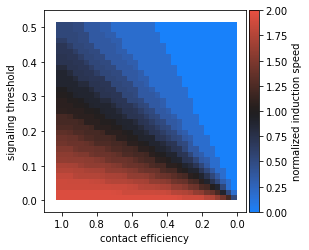

In [628]:
%%capture --no-stdout --no-display

plt2i = hv.Points(
    data=data2i,
    kdims=["contact efficiency","signaling threshold"],
    vdims=["normalized induction speed"],
# ).groupby(
#     ["signaling threshold"]
).opts(
    color="normalized induction speed",
    cmap=cc.bkr,
#     logx=True,
    s=120,
    xlim=(1.1, -0.05),
#     aspect=2.3,
    padding=0.1,
    colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     3
# # ).opts(
# #     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


plt2i

In [557]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0.0, 0.2, 5)[1:]
r_space = 1/np.sqrt(np.linspace(1, 2, 24))
beta_space = np.linspace(0, 1, 24)[1:]

free_params = (k_space, r_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space2ii = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs2ii = param_space2ii.shape[0]

In [558]:
alpha = 3.
# k = 0.1
p = 2
# ell = 1.

delay = 0.4

L = 20

In [559]:
iterator = range(n_runs2ii)
iterator = tqdm.tqdm(iterator)
vmeans2ii = np.empty(n_runs2ii, dtype=np.float32)
for i in iterator:
    k, r, beta = param_space2ii[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_2)
    
    ell = (r/np.sqrt(3)).astype(np.float32)
    args = (alpha, k, p, ell, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans2ii[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 2208/2208 [02:33<00:00, 14.38it/s]


In [560]:
data2ii = pd.DataFrame({
    "signaling threshold": param_space2ii[:, 0], 
    "cell-cell distance": param_space2ii[:, 1],
    "contact efficiency": param_space2ii[:, 2],
    "Mean wavefront speed": vmeans2ii,
})

data2ii["% confluency"] = 100 * data2ii["cell-cell distance"] ** -2
data2ii["normalized induction speed"] = data2ii["Mean wavefront speed"] / data2ii["cell-cell distance"]

:NdLayout   [signaling threshold]
   :Points   [% confluency,contact efficiency]   (normalized induction speed,signaling threshold)
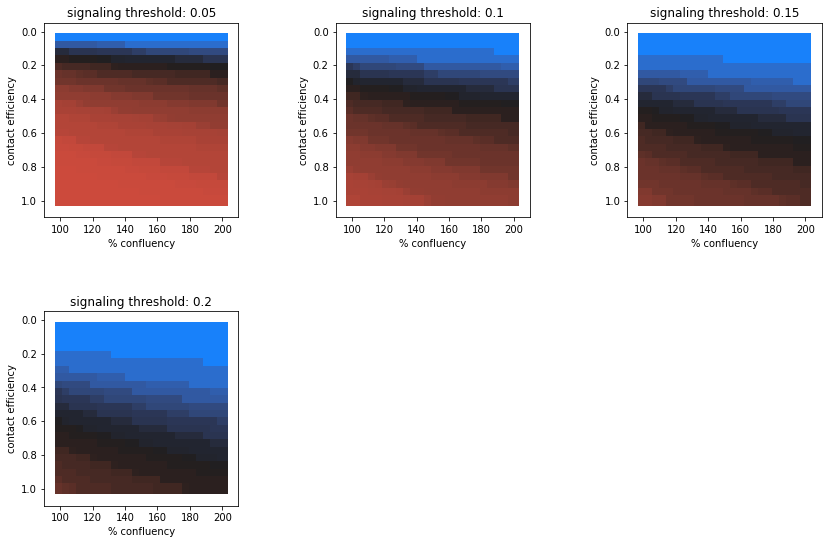

In [631]:
%%capture --no-stdout --no-display

plt2ii = hv.Points(
    data=data2ii,
    kdims=["% confluency", "contact efficiency"],
    vdims=["normalized induction speed", "signaling threshold"],
).groupby(
    ["signaling threshold"]
).opts(
    color="normalized induction speed",
    cmap=cc.bkr,
#     logx=True,
    s=120,
    ylim=(1.1,-0.05),
#     aspect=2.3,
    padding=0.1,
#     colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
).layout(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
).cols(
    3
# ).opts(
#     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


plt2ii

In [621]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0.0, 0.4, 5)[1:]
beta_space = np.linspace(0, 1, 33)

free_params = (k_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space2icurve = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs2icurve = param_space2icurve.shape[0]

In [622]:
alpha = 3.
# k = 0.1
p = 2
r = 1.

delay = 0.4

L = 20

In [623]:
iterator = range(n_runs2icurve)
iterator = tqdm.tqdm(iterator)
vmeans2icurve = np.empty(n_runs2icurve, dtype=np.float32)
for i in iterator:
    k, beta = param_space2icurve[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_2)
    
    ell = r/np.sqrt(3)
    args = (alpha, k, p, ell, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans2icurve[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 132/132 [00:10<00:00, 12.07it/s]


In [624]:
data2icurve = pd.DataFrame({
    "signaling threshold": param_space2icurve[:, 0], 
    "contact efficiency": param_space2icurve[:, 1],
    "cell-cell distance": r,
    "Mean wavefront speed": vmeans2icurve,
})

data2icurve["% confluency"] = 100 * data2icurve["cell-cell distance"] ** -2
data2icurve["normalized induction speed"] = data2icurve["Mean wavefront speed"] / data2icurve["cell-cell distance"]

:NdOverlay   [signaling threshold]
   :Curve   [contact efficiency]   (normalized induction speed,signaling threshold)
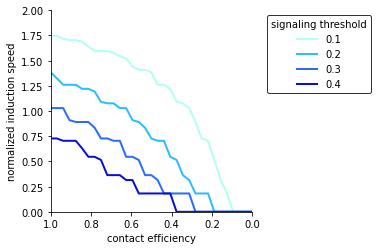

In [633]:
%%capture --no-stdout --no-display

cycle = sample_cycle(cc.kbc[::-1], 5)

plt2icurve = hv.Curve(
    data=data2icurve,
    kdims=["contact efficiency"],
    vdims=["normalized induction speed", "signaling threshold"],
).groupby(
    ["signaling threshold"]
).opts(
    padding=0.1,
).options(
).overlay(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
# ).cols(
#     2
).opts(
    legend_position="right",
    xlim=(1,0),
    ylim=(0,2),
).options(
    {"Curve": dict(color=cycle)}
)


plt2icurve

In [841]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [842]:
alpha = 3.
k = 0.2
p = 2
r = 1.

delay = 0.4

L = 20

In [843]:
betaa, betab = 1.0, 0.5

X, Adj = lsig.hex_Adj(L, r=r, csr=False)
n = X.shape[0]
sender_idx = lsig.get_center_cells(X)[0]
S0 = np.zeros(n, dtype=np.float32)
S0[sender_idx] = 1

rhs = get_rhs(Adj, sender_idx, tc_rhs_2)

ell = r/np.sqrt(3)
argsa = (alpha, k, p, ella, betaa)
argsb = (alpha, k, p, ella, betab)

Sa = lsig.integrate_DDE(
    t_span=t,
    rhs=rhs,
    dde_args=argsa,
    E0=S0a,
    delay=delay,
    progress_bar=True,
)

S0ab = Sa[(nt // 2 + 1)]

Sab = lsig.integrate_DDE(
    t_span=t[:(nt // 2 + 1)],
    rhs=rhs,
    dde_args=argsb,
    E0=S0ab,
    delay=delay,
    progress_bar=True,
)

Sb = lsig.integrate_DDE(
    t_span=t,
    rhs=rhs,
    dde_args=argsb,
    E0=S0b,
    delay=delay,
    progress_bar=True,
)

100%|██████████| 1000/1000 [00:00<00:00, 22281.45it/s]


In [844]:
Sab = np.concatenate([Sa[:(nt // 2 + 1)], Sab[1:]])

In [845]:
fnamea = f"hex_conc_alpha{alpha:.1f}_k{k:.1e}_p{p:.1f}_delta{delta:.1f}_tau{delay:.2f}_beta{betaa:.1f}_title"
fnameb = f"hex_conc_alpha{alpha:.1f}_k{k:.1e}_p{p:.1f}_delta{delta:.1f}_tau{delay:.2f}_beta{betab:.1f}_title"
fnameab = f"hex_conc_alpha{alpha:.1f}_k{k:.1e}_p{p:.1f}_delta{delta:.1f}_tau{delay:.2f}_beta{betaa:.1f}-{betab:.1f}_title"

In [846]:
rs = r * np.ones((nt, n))

In [847]:
radas = lsig.beta_to_rad(np.array([betaa]), r) * np.ones((nt, n))
radbs = lsig.beta_to_rad(np.array([betab]), r) * np.ones((nt, n))
radabs = np.concatenate([ras[:(nt // 2 + 1)], rbs[(nt // 2 + 1):]])

betaabs = np.concatenate([[betaa] * (nt // 2), [betab] * (nt // 2 + 1)])

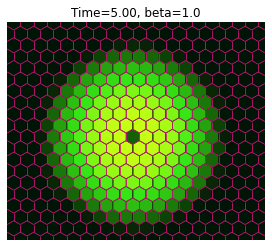

In [848]:
title_funa = lambda i: f"Time={t[i]:.2f}, beta={betaa:.1f}"

lsig.inspect_out(
    X=X,
    cell_radii=radas,
    L=L,
    var=Sa, 
    vmin=0, 
    vmax=3, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    ppatch_kwargs=dict(edgecolor=None, linewidth=0.5),
    lcoll_kwargs=dict(linewidth=0.8),
    title=title_funa(nt-1)
)

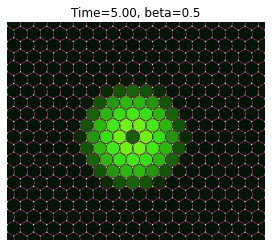

In [849]:
title_funb = lambda i: f"Time={t[i]:.2f}, beta={betab:.1f}"

lsig.inspect_out(
    X=X,
    cell_radii=radbs,
    L=L,
    var=Sb, 
    vmin=0, 
    vmax=3, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    ppatch_kwargs=dict(edgecolor=None, linewidth=0.5),
    lcoll_kwargs=dict(linewidth=0.8),
    title=title_funb(nt-1)
)

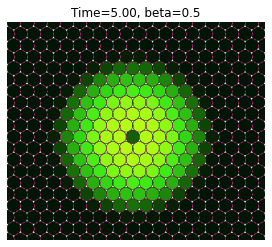

In [850]:
title_funab = lambda i: f"Time={t[i]:.2f}, beta={betaabs[i]:.1f}"

lsig.inspect_out(
    X=X,
    cell_radii=radabs,
    L=L,
    var=Sab, 
    vmin=0, 
    vmax=3, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    ppatch_kwargs=dict(edgecolor=None, linewidth=0.5),
    lcoll_kwargs=dict(linewidth=0.8),
    title=title_funab(nt-1)
)

Writing to: plots\hex_conc_alpha3.0_k2.0e-01_p2.0_delta3.0_tau0.40_beta1.0_title


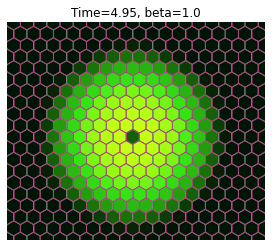

In [833]:
lsig.animate_var(
    X=X,
    cell_radii=radas,
    L=L,
    var=Sa, 
#     n_frames=100,
    file_name=fnamea,
#     dir_name="plots",
#     fps=20, 
    vmin=0, 
    vmax=3, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    lcoll_kwargs=dict(linewidth=0.5),
    title_fun=title_funa
)

Writing to: plots\hex_conc_alpha3.0_k2.0e-01_p2.0_delta3.0_tau0.40_beta0.5_title


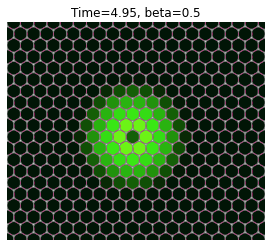

In [851]:
lsig.animate_var(
    X=X,
    cell_radii=radbs,
    L=L,
    var=Sb, 
#     n_frames=100,
    file_name=fnameb,
#     dir_name="plots",
#     fps=20, 
    vmin=0, 
    vmax=3, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    lcoll_kwargs=dict(linewidth=0.5),
    title_fun=title_funb
)

Writing to: plots\hex_conc_alpha3.0_k2.0e-01_p2.0_delta3.0_tau0.40_beta1.0-0.5_title


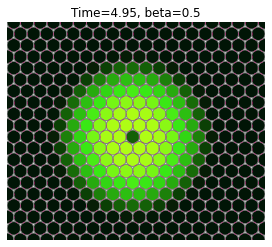

In [852]:
lsig.animate_var(
    X=X,
    cell_radii=radabs,
    L=L,
    var=Sab, 
#     n_frames=100,
    file_name=fnameab,
#     dir_name="plots",
#     fps=20, 
    vmin=0, 
    vmax=3, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    lcoll_kwargs=dict(linewidth=0.5),
    title_fun=title_funab
)

<hr>

## Model 3: Variable shape and *cis*-inhibition

Same as `Model 1`, with the addition of a parameter $\delta$ representing the 

\begin{align}
\dot{\vec{s}} &= \alpha \,\frac{\vec{s}_t(t-\tau)^p}{\big(P_0 k\big)^p + \delta^p\, \vec{s}(t-\tau)^p + \vec{s}_t(t-\tau)^p} - \vec{s}\\[1em]
\vec{s}_t &= \beta\, \ell\,A\,\vec{s} \\[1em]
\end{align}

In [25]:
@numba.njit
def tc_rhs_3(S, S_delay, Adj, sender_idx, alpha, k, p, ell, delta, beta):
    """
    """

    # Get input signal across each interface
    S_bar = beta * ell * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        alpha
        * (S_bar ** p)
        / (
            (6 / np.sqrt(3) * k) ** p
            + (6 / np.sqrt(3) * delta * S_delay) ** p
            + S_bar ** p
        )
        - S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

In [26]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [436]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0.0, 0.2, 5)[1:]
# r_space = 1/np.sqrt(np.linspace(1, 2, 15))
delta_space = np.linspace(0, 3, 20)
beta_space = np.linspace(0, 1, 20)[1:]

free_params = (k_space, delta_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space3ai = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs3ai = param_space3ai.shape[0]

In [437]:
alpha = 3.
# k = 0.1
p = 2
r = 1.

delay = 0.4

L = 20

In [438]:
iterator = range(n_runs3ai)
iterator = tqdm.tqdm(iterator)
vmeans3ai = np.empty(n_runs3ai, dtype=np.float32)
for i in iterator:
    k, delta, beta = param_space3ai[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_3a)
    
    ell = (r/np.sqrt(3)).astype(np.float32)
    args = (alpha, k, p, ell, delta, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans3ai[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1520/1520 [01:47<00:00, 14.09it/s]


In [439]:
data3ai = pd.DataFrame({
    "signaling threshold": param_space3ai[:, 0], 
    "cell-cell distance": r,
    "feedback strength": param_space3ai[:, 1],
    "contact efficiency": param_space3ai[:, 2],
    "Mean wavefront speed": vmeans3ai,
})

data3ai["% confluency"] = 100 * data3ai["cell-cell distance"] ** -2
data3ai["normalized induction speed"] = data3ai["Mean wavefront speed"] / data3ai["cell-cell distance"]

:NdLayout   [signaling threshold]
   :Points   [contact efficiency,feedback strength]   (normalized induction speed,signaling threshold)
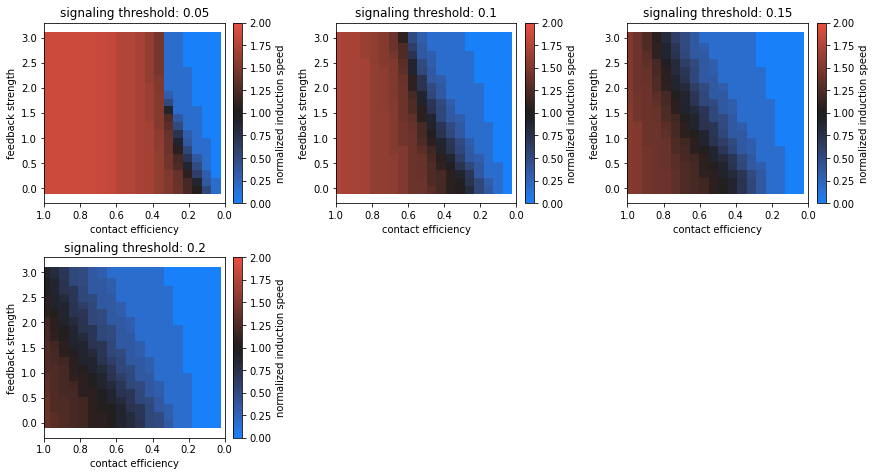

In [440]:
%%capture --no-stdout --no-display

plt = hv.Points(
    data=data3ai,
    kdims=["contact efficiency", "feedback strength"],
    vdims=["normalized induction speed", "signaling threshold", ],
).groupby(
    ["signaling threshold", ]
).opts(
    color="normalized induction speed",
    cmap=cc.bkr,
#     logx=True,
    s=120,
    xlim=(1,0),
#     aspect=2.3,
    padding=0.1,
    colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
).layout(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
).cols(
    3
# ).opts(
#     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


plt

In [381]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0.0, 0.2, 5)[1:]
# r_space = 1/np.sqrt(np.linspace(1, 2, 15))
delta_space = np.linspace(0, 3, 20)
beta_space = np.linspace(0, 1, 20)[1:]

free_params = (k_space, delta_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space3aii = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs3aii = param_space3aii.shape[0]

In [382]:
alpha = 1.2
# k = 0.1
p = 2
r = 1.

delay = 0.4

L = 20

In [349]:
iterator = range(n_runs3aii)
iterator = tqdm.tqdm(iterator)
vmeans3aii = np.empty(n_runs3aii, dtype=np.float32)
for i in iterator:
    k, delta, beta = param_space3aii[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_3a)
    
    ell = (r/np.sqrt(3)).astype(np.float32)
    args = (alpha, k, p, ell, delta, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans3aii[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1520/1520 [01:42<00:00, 14.76it/s]


In [383]:
data3aii = pd.DataFrame({
    "signaling threshold": param_space3aii[:, 0], 
    "cell-cell distance": r,
    "feedback strength": param_space3aii[:, 1],
    "contact efficiency": param_space3aii[:, 2],
    "Mean wavefront speed": vmeans3aii,
})

data3aii["% confluency"] = 100 * data3aii["cell-cell distance"] ** -2
data3aii["normalized induction speed"] = data3aii["Mean wavefront speed"] / data3aii["cell-cell distance"]

:NdLayout   [signaling threshold]
   :Points   [contact efficiency,feedback strength]   (normalized induction speed,signaling threshold)
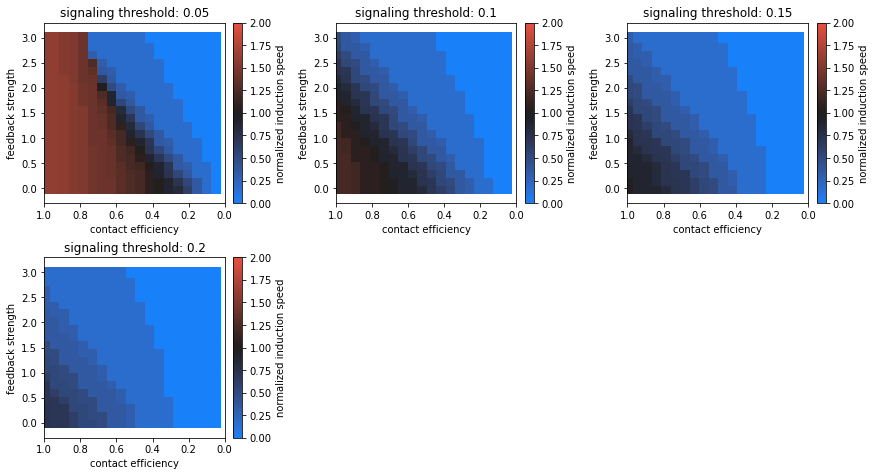

In [386]:
%%capture --no-stdout --no-display

plt = hv.Points(
    data=data3aii,
    kdims=["contact efficiency", "feedback strength"],
    vdims=["normalized induction speed", "signaling threshold", ],
).groupby(
    ["signaling threshold", ]
).opts(
    color="normalized induction speed",
    cmap=cc.bkr,
#     logx=True,
    s=120,
    xlim=(1,0),
#     aspect=2.3,
    padding=0.1,
    colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
).layout(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
).cols(
    3
# ).opts(
#     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


plt

In [460]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0.0, 0.5, 33)[1:]
beta_space = np.linspace(0, 1, 33)[1:]

free_params = (k_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space3aiii = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs3aiii = param_space3aiii.shape[0]

In [473]:
alpha = 3.
# k = 0.1
p = 2
r = 1.
delta = 3

delay = 0.4

L = 20

In [474]:
iterator = range(n_runs3aiii)
iterator = tqdm.tqdm(iterator)
vmeans3aiii = np.empty(n_runs3aiii, dtype=np.float32)
for i in iterator:
    k, beta = param_space3aiii[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_3a)
    
    ell = (r/np.sqrt(3)).astype(np.float32)
    args = (alpha, k, p, ell, delta, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans3aiii[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1024/1024 [01:10<00:00, 14.59it/s]


In [475]:
data3aiii = pd.DataFrame({
    "signaling threshold": param_space3aiii[:, 0], 
    "cell-cell distance": r,
    "contact efficiency": param_space3aiii[:, 1],
    "Mean wavefront speed": vmeans3aiii,
})

data3aiii["% confluency"] = 100 * data3aiii["cell-cell distance"] ** -2
data3aiii["normalized induction speed"] = data3aiii["Mean wavefront speed"] / data3aiii["cell-cell distance"]

:Layout
   .Points.I  :Points   [contact efficiency,signaling threshold]   (normalized induction speed)
   .Points.II :Points   [contact efficiency,signaling threshold]   (normalized induction speed)
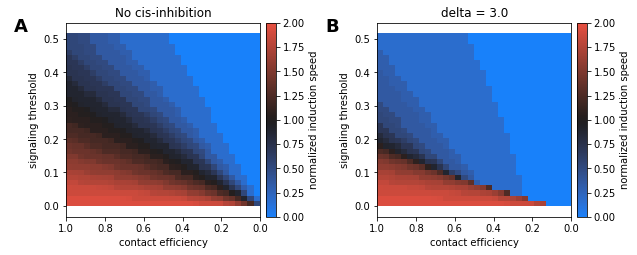

In [853]:
%%capture --no-stdout --no-display

plt3aiii = hv.Points(
    data=data3aiii,
    kdims=["contact efficiency","signaling threshold"],
    vdims=["normalized induction speed"],
# ).groupby(
#     ["signaling threshold"]
).opts(
    color="normalized induction speed",
    cmap=cc.bkr,
#     logx=True,
    s=120,
    xlim=(1,0),
#     aspect=2.3,
    padding=0.1,
    colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     3
# # ).opts(
# #     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


plt2bii.opts(title="No cis-inhibition") + plt3aiii.opts(title="delta = 3.0")

In [81]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [82]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0.0, 0.5, 33)[1:]
r_space = 1/np.sqrt(np.linspace(1, 2, 33))

free_params = (k_space, r_space)

param_space = np.meshgrid(*free_params)
param_space1ii = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs1ii = param_space1ii.shape[0]

In [91]:
alpha = 3
# k = 0.1
p = 2
# ell = 1.

delay = 0.4

L = 20

In [92]:
iterator = range(n_runs1ii)
iterator = tqdm.tqdm(iterator)
vmeans1ii = np.empty(n_runs1ii, dtype=np.float32)
for i in iterator:
    k, r = param_space1ii[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_1)
    
    ell = r/np.sqrt(3)
    args = (alpha, k, p, ell)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans1ii[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1056/1056 [01:14<00:00, 14.24it/s]


In [93]:
data1ii = pd.DataFrame({
    "signaling threshold": param_space1ii[:, 0], 
    "cell-cell distance": param_space1ii[:, 1],
    "Mean wavefront speed": vmeans1ii,
})

data1ii["% confluency"] = 100 * data1ii["cell-cell distance"] ** -2
data1ii["normalized induction speed"] = data1ii["Mean wavefront speed"] / data1ii["cell-cell distance"]

:Points   [% confluency,signaling threshold]   (normalized induction speed)
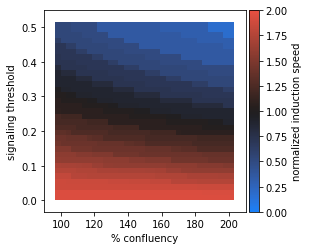

In [94]:
%%capture --no-stdout --no-display

plt1ii = hv.Points(
    data=data1ii,
    kdims=["% confluency", "signaling threshold"],
    vdims=["normalized induction speed", ],
# ).groupby(
#     ["% confluency"]
).opts(
    color="normalized induction speed",
    cmap=cc.bkr,
#     logx=True,
    s=120,
#     aspect=2.3,
    padding=0.1,
    colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     2
# ).opts(
#     title="Propagation speed drops slightly as confluency increases",
)


plt1ii

In [27]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0, 0.5, 33)[1:]
r_space = 1/np.sqrt(np.linspace(1, 2, 33))

free_params = (k_space, r_space)

param_space = np.meshgrid(*free_params)
param_space3aiv = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs3aiv = param_space3aiv.shape[0]

In [28]:
alpha = 3
# k = 0.1
p = 2
# r = 1.
delta = 6
beta = 1.

delay = 0.4

L = 20

In [29]:
iterator = range(n_runs3aiv)
iterator = tqdm.tqdm(iterator)
vmeans3aiv = np.empty(n_runs3aiv, dtype=np.float32)
for i in iterator:
    k, r = param_space3aiv[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_3)
    
    ell = (r/np.sqrt(3)).astype(np.float32)
    args = (alpha, k, p, ell, delta, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans3aiv[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1056/1056 [01:11<00:00, 14.79it/s]


In [30]:
data3aiv = pd.DataFrame({
    "signaling threshold": param_space3aiv[:, 0], 
    "cell-cell distance": param_space3aiv[:, 1],
    "Mean wavefront speed": vmeans3aiv,
})

data3aiv["% confluency"] = 100 * data3aiv["cell-cell distance"] ** -2
data3aiv["normalized induction speed"] = data3aiv["Mean wavefront speed"] / data3aiv["cell-cell distance"]

:Layout
   .Points.I  :Points   [% confluency,signaling threshold]   (normalized induction speed)
   .Points.II :Points   [% confluency,signaling threshold]   (normalized induction speed)
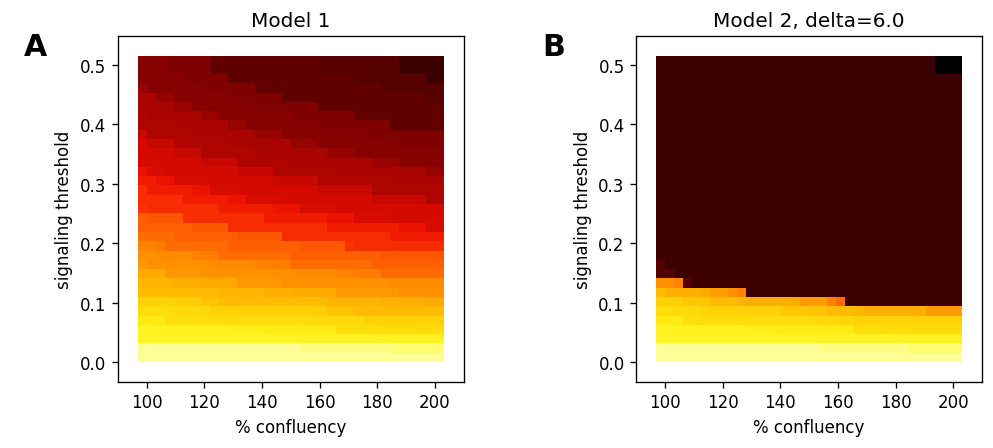

In [31]:
%%capture --no-stdout --no-display

plt3aiv = hv.Points(
    data=data3aiv,
    kdims=["% confluency","signaling threshold"],
    vdims=["normalized induction speed"],
# ).groupby(
#     ["signaling threshold"]
).opts(
    color="normalized induction speed",
    cmap=cc.fire,
#     logy=True,
    s=120,
#     xlim=(1,0),
#     aspect=1/2.3,
    padding=0.1,
#     colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     3
# # ).opts(
# #     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


layout3aiv = plt1i.opts(title="Model 1", cmap=cc.fire, colorbar=False) + plt3aiv.opts(title=f"Model 2, delta={delta:.1f}")
hv.output(layout3aiv, dpi=120)

In [32]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.logspace(np.log10(0.05), np.log10(0.5), 33)
r_space = 1/np.sqrt(np.linspace(1, 2, 33))

free_params = (k_space, r_space)

param_space = np.meshgrid(*free_params)
param_space3aivlog = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs3aivlog = param_space3aivlog.shape[0]

In [33]:
alpha = 3
# k = 0.1
p = 2
# r = 1.
delta = 6
beta = 1.

delay = 0.4

L = 20

In [34]:
iterator = range(n_runs3aivlog)
iterator = tqdm.tqdm(iterator)
vmeans3aivlog = np.empty(n_runs3aivlog, dtype=np.float32)
for i in iterator:
    k, r = param_space3aivlog[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_3)
    
    ell = (r/np.sqrt(3)).astype(np.float32)
    args = (alpha, k, p, ell, delta, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans3aivlog[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1089/1089 [01:11<00:00, 15.18it/s]


In [35]:
data3aivlog = pd.DataFrame({
    "signaling threshold": param_space3aivlog[:, 0], 
    "cell-cell distance": param_space3aivlog[:, 1],
    "Mean wavefront speed": vmeans3aivlog,
})

data3aivlog["% confluency"] = 100 * data3aivlog["cell-cell distance"] ** -2
data3aivlog["normalized induction speed"] = data3aivlog["Mean wavefront speed"] / data3aivlog["cell-cell distance"]

:Layout
   .Points.I  :Points   [% confluency,signaling threshold]   (normalized induction speed)
   .Points.II :Points   [% confluency,signaling threshold]   (normalized induction speed)
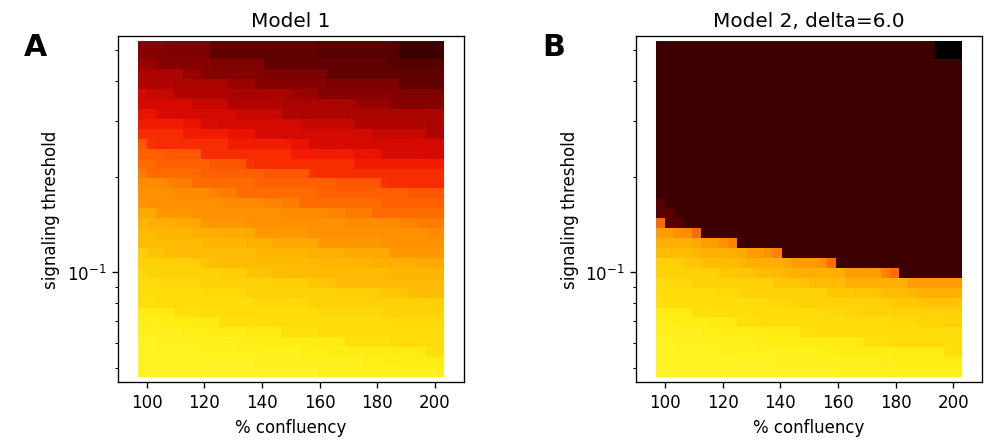

In [36]:
%%capture --no-stdout --no-display

plt3aivlog = hv.Points(
    data=data3aivlog,
    kdims=["% confluency","signaling threshold"],
    vdims=["normalized induction speed"],
# ).groupby(
#     ["signaling threshold"]
).opts(
    color="normalized induction speed",
    cmap=cc.fire,
    logy=True,
    s=120,
#     xlim=(1,0),
    aspect=1/2.3,
    padding=0.1,
#     colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     3
# # ).opts(
# #     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


layout3aivlog = plt1ilog.opts(title="Model 1", cmap=cc.fire, colorbar=False) + plt3aivlog.opts(title=f"Model 2, delta={delta:.1f}")
hv.output(layout3aivlog, dpi=120)

In [ ]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0.0, 0.5, 33)[1:]
r_space = 1/np.sqrt(np.linspace(1, 2, 33))

free_params = (k_space, r_space)

param_space = np.meshgrid(*free_params)
param_space3av = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs3av = param_space3av.shape[0]

In [96]:
alpha = 3.
# k = 0.1
p = 2
# r = 1.
delta = 4
beta = 1.

delay = 0.4

L = 20

In [97]:
iterator = range(n_runs3av)
iterator = tqdm.tqdm(iterator)
vmeans3av = np.empty(n_runs3av, dtype=np.float32)
for i in iterator:
    k, r = param_space3av[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_3)
    
    ell = (r/np.sqrt(3)).astype(np.float32)
    args = (alpha, k, p, ell, delta, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans3av[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1056/1056 [01:21<00:00, 12.94it/s]


In [98]:
data3av = pd.DataFrame({
    "signaling threshold": param_space3av[:, 0], 
    "cell-cell distance": param_space3av[:, 1],
    "Mean wavefront speed": vmeans3av,
})

data3av["% confluency"] = 100 * data3av["cell-cell distance"] ** -2
data3av["normalized induction speed"] = data3av["Mean wavefront speed"] / data3av["cell-cell distance"]

:Layout
   .Points.I  :Points   [% confluency,signaling threshold]   (normalized induction speed)
   .Points.II :Points   [% confluency,signaling threshold]   (normalized induction speed)
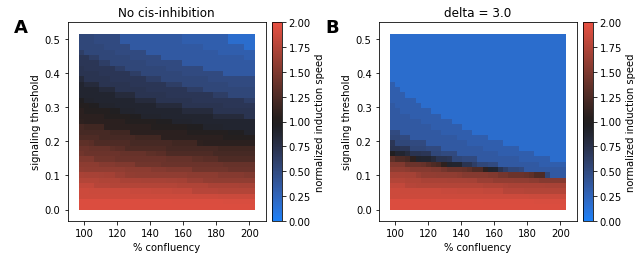

In [99]:
%%capture --no-stdout --no-display

plt3av = hv.Points(
    data=data3av,
    kdims=["% confluency","signaling threshold"],
    vdims=["normalized induction speed"],
# ).groupby(
#     ["signaling threshold"]
).opts(
    color="normalized induction speed",
    cmap=cc.bkr,
#     logx=True,
    s=120,
#     xlim=(1,0),
#     aspect=2.3,
    padding=0.1,
    colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     3
# # ).opts(
# #     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


plt1ii.opts(title="No cis-inhibition") + plt3av.opts(title="delta = 3.0")

In [37]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0.0, 0.2, 5)[1:]
r_space = 1/np.sqrt(np.linspace(1, 2, 24))
beta_space = np.linspace(0, 1, 24)[1:]

free_params = (k_space, r_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space3vi = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs3vi = param_space3vi.shape[0]

In [38]:
alpha = 3.
# k = 0.1
p = 2
# r = 1.
delta = 4

delay = 0.4

L = 20

In [39]:
iterator = range(n_runs3vi)
iterator = tqdm.tqdm(iterator)
vmeans3vi = np.empty(n_runs3vi, dtype=np.float32)
for i in iterator:
    k, r, beta = param_space3vi[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_3)
    
    ell = (r/np.sqrt(3)).astype(np.float32)
    args = (alpha, k, p, ell, delta, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans3vi[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 2208/2208 [02:33<00:00, 14.36it/s]


In [40]:
data3vi = pd.DataFrame({
    "signaling threshold": param_space3vi[:, 0], 
    "cell-cell distance": param_space3vi[:, 1],
    "contact efficiency": param_space3vi[:, 2],
    "Mean wavefront speed": vmeans3vi,
})

data3vi["% confluency"] = 100 * data3vi["cell-cell distance"] ** -2
data3vi["normalized induction speed"] = data3vi["Mean wavefront speed"] / data3vi["cell-cell distance"]

:NdLayout   [signaling threshold]
   :Points   [% confluency,contact efficiency]   (normalized induction speed,signaling threshold)
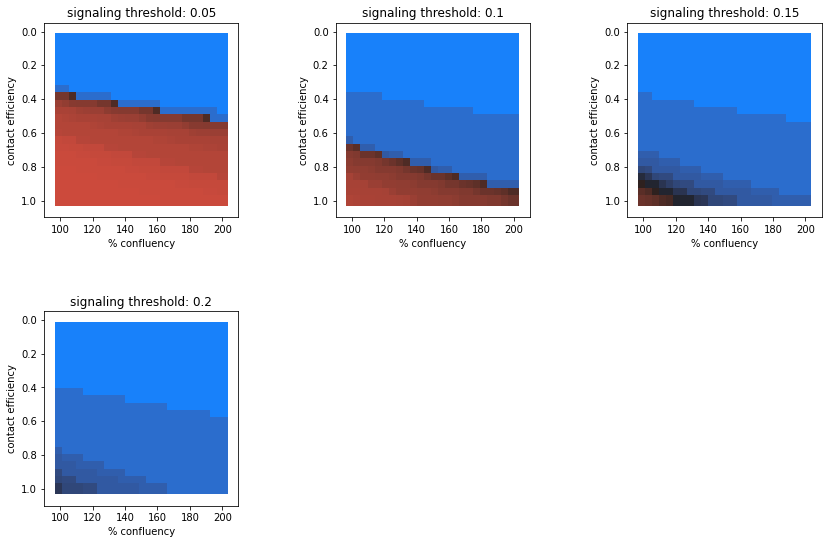

In [41]:
%%capture --no-stdout --no-display

plt3vi = hv.Points(
    data=data3vi,
    kdims=["% confluency", "contact efficiency"],
    vdims=["normalized induction speed", "signaling threshold"],
).groupby(
    ["signaling threshold"]
).opts(
    color="normalized induction speed",
    cmap=cc.bkr,
#     logx=True,
    s=120,
    ylim=(1.1,-0.05),
#     aspect=2.3,
    padding=0.1,
#     colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
).layout(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
).cols(
    3
# ).opts(
#     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


plt3vi

In [42]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.linspace(0, 0.5, 33)[1:]
beta_space = np.linspace(0, 1, 33)[1:]

free_params = (k_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space3avi = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs3avi = param_space3avi.shape[0]

In [43]:
alpha = 3
# k = 0.1
p = 2
r = 1.
delta = 3
# beta = 1.

delay = 0.4

L = 20

In [44]:
iterator = range(n_runs3avi)
iterator = tqdm.tqdm(iterator)
vmeans3avi = np.empty(n_runs3avi, dtype=np.float32)
for i in iterator:
    k, beta = param_space3avi[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_3)
    
    ell = (r/np.sqrt(3)).astype(np.float32)
    args = (alpha, k, p, ell, delta, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans3avi[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1024/1024 [01:07<00:00, 15.11it/s]


In [45]:
data3avi = pd.DataFrame({
    "signaling threshold": param_space3avi[:, 0], 
    "shape metric": param_space3avi[:, 1],
    "cell-cell distance": r,
    "Mean wavefront speed": vmeans3avi,
})

data3avi["% confluency"] = 100 * data3avi["cell-cell distance"] ** -2
data3avi["normalized induction speed"] = data3avi["Mean wavefront speed"] / data3avi["cell-cell distance"]

In [46]:
%%capture --no-stdout --no-display

plt3avi = hv.Points(
    data=data3avi,
    kdims=["shape metric", "signaling threshold"],
    vdims=["normalized induction speed"],
# ).groupby(
#     ["signaling threshold"]
).opts(
    color="normalized induction speed",
    cmap=cc.CET_L8,
#     logy=True,
    s=120,
    xlim=(1,0),
#     aspect=1/2.3,
    padding=0.1,
    colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     3
# # ).opts(
# #     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)

In [47]:
# alpha_space = np.linspace(0.5, 1.5, 21)
k_space = np.logspace(np.log10(0.05), np.log10(0.5), 33)
beta_space = np.linspace(0, 1, 33)[1:]

free_params = (k_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space3avilog = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs3avilog = param_space3avilog.shape[0]

In [48]:
alpha = 3
# k = 0.1
p = 2
r = 1.
delta = 3
# beta = 1.

delay = 0.4

L = 20

In [49]:
iterator = range(n_runs3avilog)
iterator = tqdm.tqdm(iterator)
vmeans3avilog = np.empty(n_runs3avilog, dtype=np.float32)
for i in iterator:
    k, beta = param_space3avilog[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_3)
    
    ell = (r/np.sqrt(3)).astype(np.float32)
    args = (alpha, k, p, ell, delta, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans3avilog[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1056/1056 [01:09<00:00, 15.22it/s]


In [50]:
data3avilog = pd.DataFrame({
    "signaling threshold": param_space3avilog[:, 0], 
    "shape metric": param_space3avilog[:, 1],
    "cell-cell distance": r,
    "Mean wavefront speed": vmeans3avilog,
})

data3avilog["% confluency"] = 100 * data3avilog["cell-cell distance"] ** -2
data3avilog["normalized induction speed"] = data3avilog["Mean wavefront speed"] / data3avi["cell-cell distance"]

In [51]:
%%capture --no-stdout --no-display

plt3avilog = hv.Points(
    data=data3avilog,
    kdims=["shape metric", "signaling threshold"],
    vdims=["normalized induction speed"],
# ).groupby(
#     ["signaling threshold"]
).opts(
    color="normalized induction speed",
    cmap=cc.CET_L8,
    logy=True,
    s=120,
    xlim=(1,0),
    aspect=1/2.3,
    padding=0.1,
    colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     3
# # ).opts(
# #     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)

:Layout
   .Points.I   :Points   [% confluency,signaling threshold]   (normalized induction speed)
   .Points.II  :Points   [% confluency,signaling threshold]   (normalized induction speed)
   .Points.III :Points   [shape metric,signaling threshold]   (normalized induction speed)
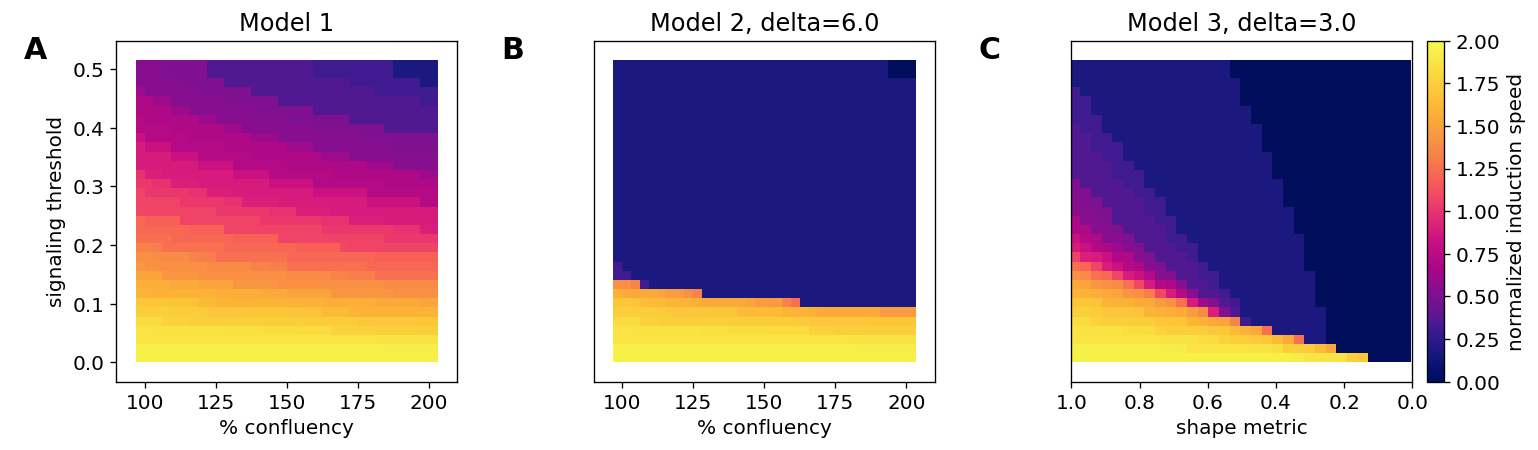

In [52]:
%%capture --no-stdout --no-display

layout3avi = (plt1i.opts(
    title="Model 1", 
    cmap=cc.CET_L8, 
    colorbar=False,
#     xlabel="",
    fontscale=1.2,
    yticks=6,
) + plt3aiv.opts(
    title=f"Model 2, delta=6.0", 
    cmap=cc.CET_L8, 
#     colorbar=False,
    ylabel="",
    yticks=0,
    fontscale=1.2,
) + plt3avi.opts(
    title=f"Model 3, delta=3.0",
    ylabel="",
#     xlabel="",
    yticks=0,
    fontscale=1.2,
)).opts(
    hspace=0.4,
)
hv.output(layout3avi, dpi=120)

:Layout
   .Points.I   :Points   [% confluency,signaling threshold]   (normalized induction speed)
   .Points.II  :Points   [% confluency,signaling threshold]   (normalized induction speed)
   .Points.III :Points   [shape metric,signaling threshold]   (normalized induction speed)
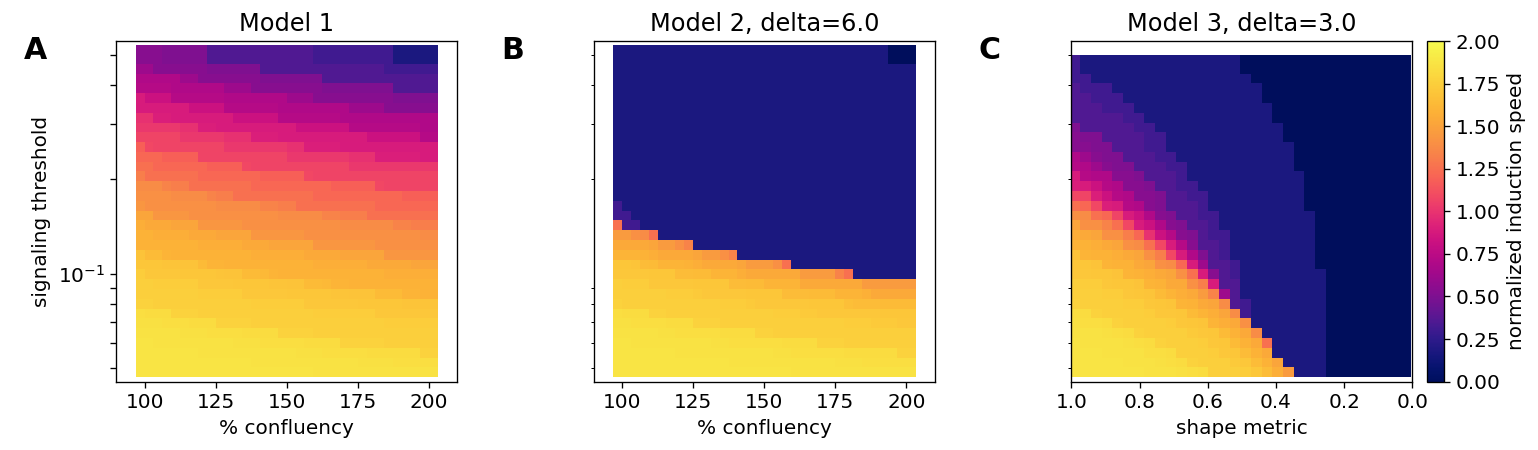

In [53]:
%%capture --no-stdout --no-display

layout3avilog = (plt1ilog.opts(
    title="Model 1", 
    cmap=cc.CET_L8, 
    colorbar=False,
#     xlabel="",
    fontscale=1.2,
    yticks=6,
) + plt3aivlog.opts(
    title=f"Model 2, delta=6.0", 
    cmap=cc.CET_L8, 
#     colorbar=False,
    ylabel="",
    yticks=0,
    fontscale=1.2,
) + plt3avilog.opts(
    title=f"Model 3, delta=3.0",
    ylabel="",
#     xlabel="",
    yticks=0,
    fontscale=1.2,
)).opts(
    hspace=0.4,
)
hv.output(layout3avilog, dpi=120)

In [57]:
# alpha_space = np.linspace(0.5, 1.5, 21)
beta_space = np.linspace(0., 1, 33)[1:]
r_space = 1/np.sqrt(np.linspace(1, 2, 33))

free_params = (beta_space, r_space)

param_space = np.meshgrid(*free_params)
param_space3b = np.array(param_space, dtype=np.float32).T.reshape(-1, len(free_params))
n_runs3b = param_space3b.shape[0]

In [58]:
alpha = 3
k = 0.12
p = 2
# r = 1.
delta = 3
# beta = 1.

delay = 0.4

L = 20

In [60]:
iterator = range(n_runs3b)
iterator = tqdm.tqdm(iterator)
vmeans3b = np.empty(n_runs3b, dtype=np.float32)
for i in iterator:
    beta, r = param_space3b[i]
    
    X, Adj = lsig.hex_Adj(L, r=r, csr=False)
    n = X.shape[0]
    sender_idx = lsig.get_center_cells(X)[0]
    S0 = np.zeros(n, dtype=np.float32)
    S0[sender_idx] = 1
    
    rhs = get_rhs(Adj, sender_idx, tc_rhs_3)
    
    ell = (r/np.sqrt(3)).astype(np.float32)
    args = (alpha, k, p, ell, delta, beta)

    S = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )

    vmeans3b[i] = lsig.act_vmean(t, X, S, 0.1, chull=True)

100%|██████████| 1056/1056 [01:13<00:00, 14.43it/s]


In [61]:
data3b = pd.DataFrame({
    "shape metric": param_space3b[:, 0], 
    "cell-cell distance": param_space3b[:, 1],
    "Mean wavefront speed": vmeans3b,
})

data3b["% confluency"] = 100 * data3b["cell-cell distance"] ** -2
data3b["normalized induction speed"] = data3b["Mean wavefront speed"] / data3b["cell-cell distance"]

:Points   [% confluency,shape metric]   (normalized induction speed)
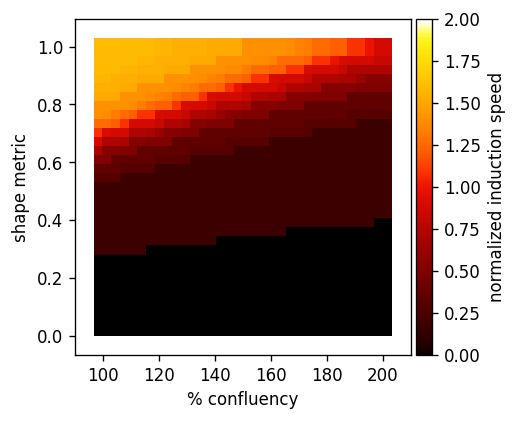

In [65]:
%%capture --no-stdout --no-display

plt3b = hv.Points(
    data=data3b,
    kdims=["% confluency","shape metric"],
    vdims=["normalized induction speed"],
# ).groupby(
#     ["signaling threshold"]
).opts(
    color="normalized induction speed",
    cmap=cc.fire,
#     logy=True,
    s=120,
#     xlim=(1,0),
#     aspect=1/2.3,
    padding=0.1,
    colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"normalized induction speed":(0, 2)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     3
# # ).opts(
# #     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


hv.output(plt3b, dpi=120)